<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Guía para presentación de proyectos.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que se pueda modelar con las herramientas vistas en el módulo. En el caso del primer módulo, optimización.

## 1. PROYECTO MÓDULO 1

 1. Elegir integrantes para proyecto (3). 
 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (de preferencia relacionado con su carrera). 


## 1.1 Ideas de proyectos:
1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)
 + Planeación de mano de obra.
 + Planeación de producción.
 + Arbitraje usando programación lineal (Financiera) http://www.meiss.com/columbia/en/teaching/1999/fall/B6015/download/lecture05/lec5.pdf
 + Planta de tratamiento de aguas residuales de bajo costo (Ingeniería civil) Numerical Methods for Engineers pg 421
 + Problema de descubrir datos ocultos
 + Optimizar diseño de divisor de voltaje


2. Ajuste de curvas (con base en los datos en https://data.worldbank.org/indicator)
 + Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
 + Por ejemplo, CO2 emissions (kt), Forest area (sq. km), están relacionados con cambio climático. En las emisiones de CO2 parece que en los últimos años la curva tiene tendencia de concavidad hacia abajo, lo que indicaría que las políticas que se estén ejecutando si están teniendo un impacto.
 + Otro ejemplo puede ser Access to electricity (% of population). Se ve que está en constante crecimiento. Se podría estimar cuándo se llegará al 95%.

___
## 2. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 2.1 Título del trabajo.
> Debe describir el trabajo.

### 2.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser concretos, evaluables y verificables.
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 2.3 Modelo que representa el problema.
> - Se debe incluir la función a optimizar y las restricciones (en caso de que existan).
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

### 2.4 Solución del problema de optimización.
> - Se debe resolver el problema de optimización.
> - ¿Condujo el algoritmo de optimización a una solución factible?

### 2.5 Visualización de la solución del problema.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

### 2.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 2.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

In [14]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [15]:
data= pd.read_excel("ExcelProyecto_Fibras.xlsx")
data

,FIBRA,Rendimiento
0,THE WESLEY II,0.1700
1,CYPRESS BUSINESS PARK,0.1638
2,STETRU PARK,0.1700
3,PARQUE FERRAN V,0.1772
4,EDERRA STREET MALL & FERRAN,0.1900
5,B CENTRAL 270,0.1676


## Restricciones


$$x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \leq 5850500$$
$$x_2 + x_3 + x_4 \leq 2340200$$
$$x_1 \leq 558750$$
$$x_1 \geq 14900$$
$$x_2 \leq 1256300$$
$$x_2 \geq 14780$$
$$x_3 \leq 1112000$$
$$x_3 \geq 13900$$
$$x_4 \leq 1272800$$
$$x_4 \geq 17600$$
$$x_5 \leq 1426830$$
$$x_5 \geq 14340$$
$$x_6 \leq 1226500$$
$$x_6 \geq 11150$$
$$x_5 \leq 1170100$$
$$x_6 \leq 1170100$$

In [60]:
bank=5850500
rend=data["Rendimiento"]
rend
rendv=(np.asarray(rend)+np.ones([1,6]))*-1 #Multiplicación por -1 porq Maximizamos con una herramienta de Minimizar
rendv


array([[-1.17  , -1.1638, -1.17  , -1.1772, -1.19  , -1.1676]])

In [64]:
c=rendv

Aub=np.array([ [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  #Restricción 1, menor que 5850500
               [0.0, 1.0, 1.0, 1.0, 0.0, 0.0],  #Restricción 2, menor al 40% del Bank
               [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 3, x_1 menor que 558750
               [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0], #Restricción 4, x_1 mayor que 14900
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 5, x_2 menor que 1256300
               [0.0, -1.0, 0.0, 0.0, 0.0, 0.0], #Restricción 6, x_2 mayor que 14780
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],  #Restricción 7, x_3 menor que 1112000
               [0.0, 0.0, -1.0, 0.0, 0.0, 0.0], #Restricción 8, x_3 mayor que 13900
               [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],  #Restricción 9, x_4 menor que 1272800
               [0.0, 0.0, 0.0, -1.0, 0.0, 0.0], #Restricción 10, x_4 mayor que 17600
               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  #Restricción 11, x_5 menor que 1426830
               [0.0, 0.0, 0.0, 0.0, -1.0, 0.0], #Restricción 12, x_5 mayor que 14340
               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  #Restricción 13, x_6 menor que 1226500
               [0.0, 0.0, 0.0, 0.0, 0.0, -1.0], #Restricción 14, x_6 mayor que 11150
               [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #Restricción 15, x_1 menor al 20% del Bank
               [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]  #Restricción 16, x_6 menor al 20% del Bank
             ])

bub=np.array([bank,
              bank*.4,
              558750,
              14900,
              1256300,
              14780,
              1112000,
              13900,
              1272800,
              17600,
              1426830,
              14340,
              1226500,
              11150,
              bank*.2,
              bank*.2
             ])

resp=opt.linprog(c,Aub,bub)
resp

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -6465072.12
       ineqlin:  marginals: array([-0.    , -1.17  , -1.17  , -0.    , -0.    , -0.    , -0.    ,
       -0.    , -0.0072, -0.    , -1.19  , -0.    , -0.    , -0.    ,
       -0.    , -1.1676])
  residual: array([ 354620.,       0.,       0.,  573650., 1256300.,   14780.,
         44600., 1081300.,       0., 1290400.,       0., 1441170.,
         56400., 1181250.,  611350.,       0.])
         lower:  marginals: array([0.    , 0.0062, 0.    , 0.    , 0.    , 0.    ])
  residual: array([ 558750.,       0., 1067400., 1272800., 1426830., 1170100.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 1
         slack: array([ 354620.,       0.,       0.,  573650., 1256300.,   14780.,
         44600., 1081300.,       0., 1290400.,       0., 1441170.,
         56400., 1181

## Interpretación de Resultados

Para Maximizar el rendimiento del portafolio de Fibras:

- En *The Wesley II* se tienen que invertir $558,750 \$ $
- En *The Cypress Business Park* se tienen que invertir $ 0.00 \$ $
- En *Stretu Park* se tienen que invertir $  1'067,400\$ $
- En  *Parque Ferran V* se tienen que invertir $  1'272,800 \$ $
- En  *Ederra Street Mall & Ferran* se tienen que invertir $ 1'426,830 \$ $
- En  *B Central 270* se tienen que invertir $ 1'170,100 \$ $

<BarContainer object of 6 artists>

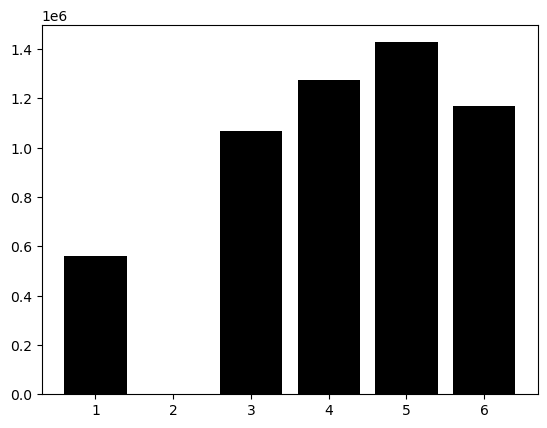

In [65]:
plt.figure()
plt.bar([1,2,3,4,5,6], [resp.x[0],resp.x[1],resp.x[2],resp.x[3],resp.x[4],resp.x[5]], color="black")


In [50]:
resp.x[0]

558750.0

___
## 3. Especificaciones adicionales.
El proyecto debe estar disponible en ~~`GitHub`~~ con los integrantes como colaboradores.

### 3.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido paterno y la inicial del primer nombre del integrante `i`.

### 3.2 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación en PowerPoint para presentar el trabajo en la clase del lunes **26 de septiembre**. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - **NO DEBE TENER CÓDIGO, PARA ESO ES EL INFORME EN EL NOTEBOOK**
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo